<font color="lightseagreen" size=+3.7><b>Periodic Table Dash App</b></font>

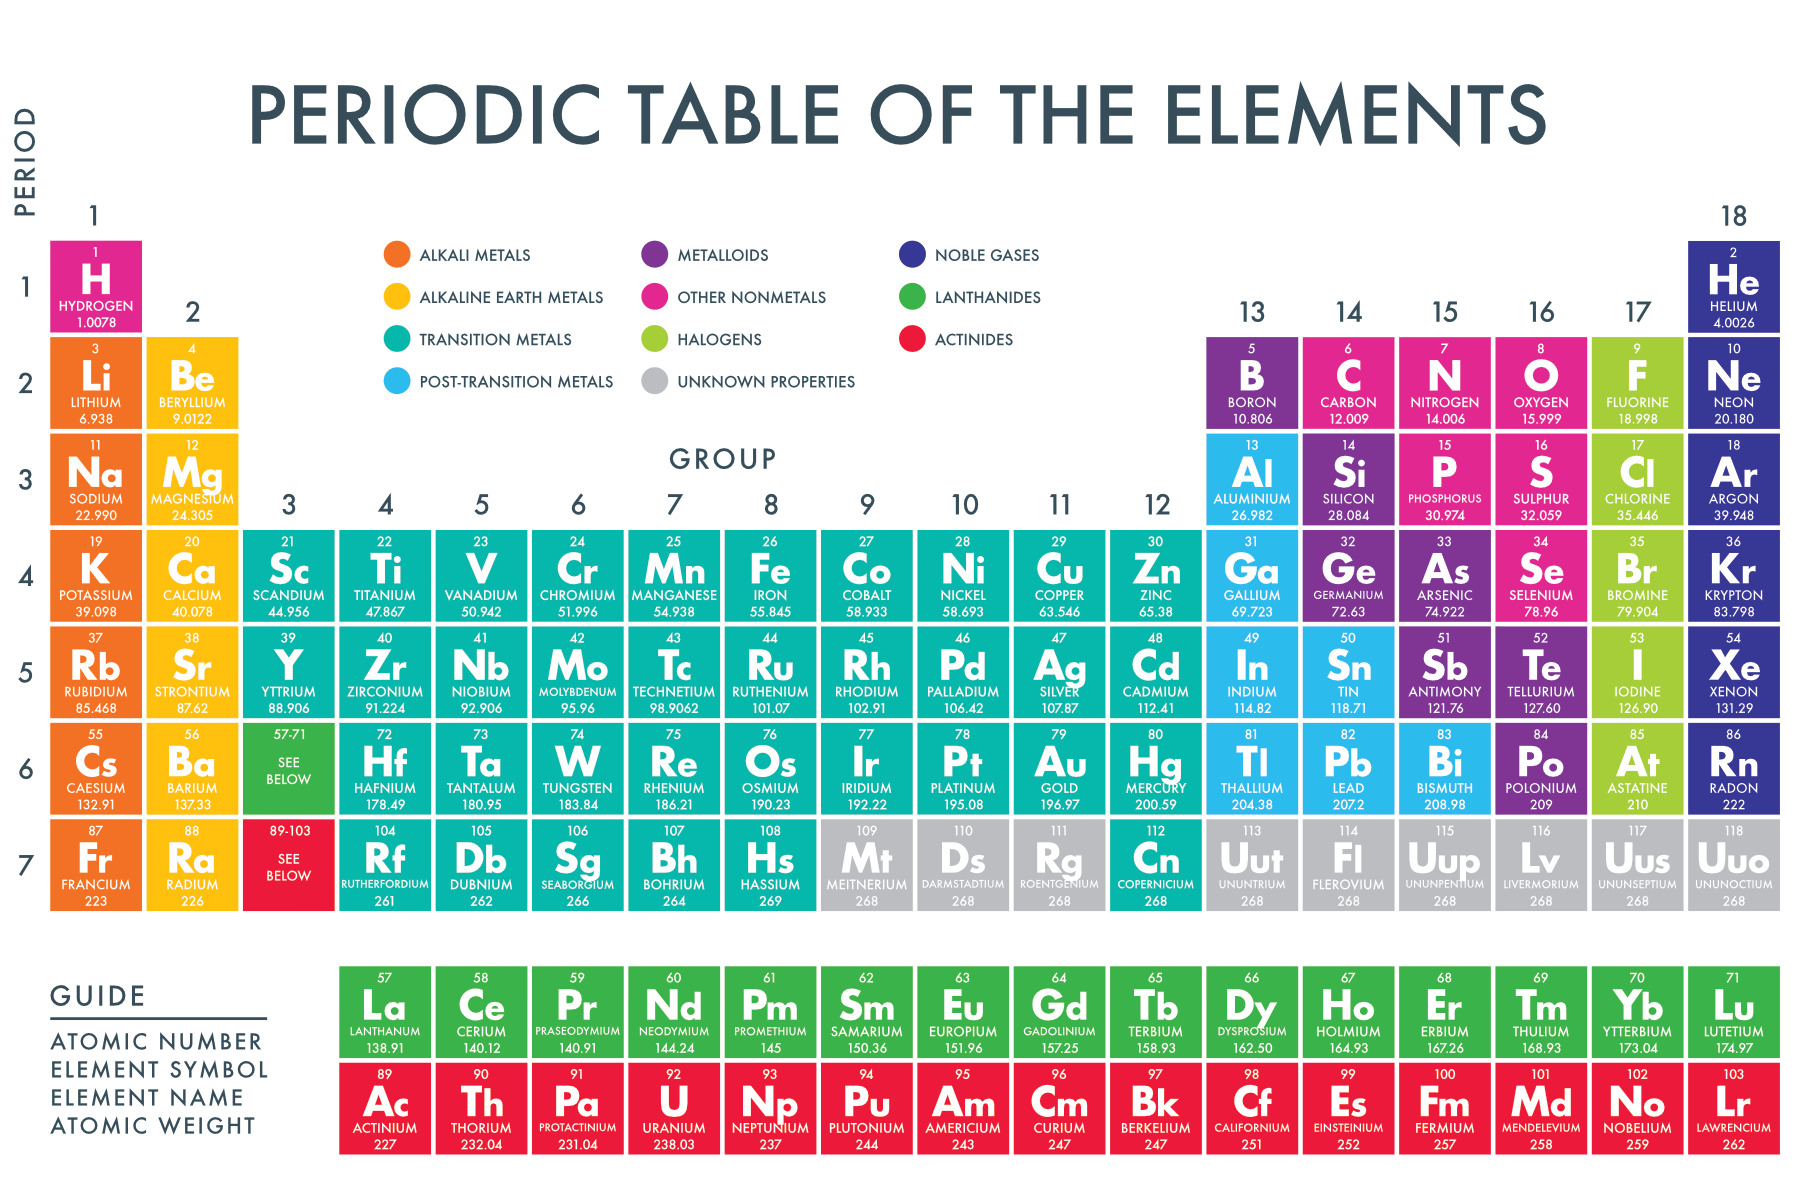

In [1]:
from dash import Dash, dcc, html, Output, Input       # pip install dash
import dash_bootstrap_components as dbc               # pip install dash-bootstrap-components
import plotly.express as px                     # pip install pandas; pip install plotly express
import pandas as pd

df=pd.read_csv('../data/processed/Periodic_Table_Cleaned.csv')
df.drop('Unnamed: 0',axis=1)

app = Dash(__name__, external_stylesheets=[dbc.themes.VAPOR])

card_main = dbc.Card([
        dbc.CardImg(src="/assets/download.jpg", top=True, bottom=False,
                    title="periodic Table", alt='Yousif_Mohammed'),
        dbc.CardBody(
            [
                html.H4("Periodic Table", className="card-title"),
                html.H6("Element Price:", className="card-subtitle"),
                html.P(
                    "Choose the Type you would like to see on the bubble & bar chart",
                    className="card-text",
                ),
                dcc.Dropdown(id='user_choice', options=[{'label': tp, "value": tp} for tp in df['Type'].unique()],
                             value='Transition Metal', clearable=False,
                             style={"color": '#000000', 'background': '#fff'}),
            ]
        ),
    ],
    color="info",   
    inverse=True,   
    outline=True,  
)

card_radiometer = dbc.Card(
    [
        dbc.CardBody([
            html.H4("Properties", className="card-title"),
            html.P("Choose the Property you would like to see on the Bar chart", className="card-text"),
            dbc.ListGroup(
                [
                    dcc.RadioItems(
                id='xaxis_raditem',
                options=[
                    {'label': 'Atomic Mass', 'value': 'AtomicMass'},
                    {'label': 'Number of Neutrons', 'value': 'NumberofNeutrons'},
                    {'label': 'Number of Protons |Electrons', 'value': 'NumberofProtons'},
                    {'label': 'Electronegativity', 'value': 'Electronegativity'},
                    {'label': 'First Ionization', 'value': 'FirstIonization'},
                    {'label': 'Density', 'value': 'Density'},
                    {'label': 'Number Of Isotopes', 'value': 'NumberOfIsotopes'},
                    {'label': 'Number of Shells', 'value': 'NumberofShells'},
                    
                ],
                value='AtomicMass',
            ),
                ], flush=True)
        ]),
        
    ], color="info ",
)

scatter = dbc.Card([
    dcc.Graph(id='scatter')], body=False, color="light"
)
bar = dbc.Card([
    dcc.Graph(id='bar')], body=False, color="light"
)


app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardImg(src='/assets/linkedin-logo2.png')
            ],className='mb-2'),
            dbc.Card([
                dbc.CardBody([
                    dbc.CardLink("YousifMohamed", target="_blank",
                                 href="https://www.linkedin.com/feed/"
                    )
                ])
            ]),
        ], width=2),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    dbc.Col(html.H1("Periodic Table Analysis",
                        className='text-center text-primary'
        ))])
            ], color="info", style={'height':'18vh'}),
        ], width=8),
        dbc.Col([
            dbc.Card([
                dbc.CardImg(src='/assets/git.png')
            ],className='mb-2'),
            dbc.Card([
                dbc.CardBody([
                    dbc.CardLink("YousifMohamed", target="_blank",
                                 href="https://github.com/yousifmohamed814/periodic-Table-Analysis"
                    )
                ])
            ]),
        ], width=2),
    ],className='mb-2 mt-2'),
    dbc.Row([dbc.Col(card_main, width=6),
             dbc.Col(scatter, width=6),
             dbc.Col(card_radiometer, width=6),
             dbc.Col(bar, width=6)]),
])


@app.callback(
    [Output("scatter", "figure"),
    Output("bar", "figure")],
    [Input("user_choice", "value"),
     Input("xaxis_raditem", "value")]
)
def update_graph(user_choice,x_axis):
    #Bubble Chart 
    df=pd.read_csv('../data/processed/Periodic_Table_Cleaned.csv')
    df=df.drop('Unnamed: 0',axis=1)
    dff=df[(df['Type']==user_choice)]
    scatter = px.scatter(dff, x=dff['Element'] ,
                         y=dff["Price_USD/kg"],
                         color="Element",
                         hover_name="Price_USD/kg",title='Elements Price',
                         width=610,height=550,
                         size="Price_USD/kg",size_max=50,
                         log_y=True).update_layout(showlegend=True, title_x=0.5)
    #Bar Chart
    numerical_df=df[['Type','Element' ,'AtomicMass','NumberofNeutrons','NumberofProtons',
                 'NumberofElectrons','Period','Group',
                 'AtomicRadius','Electronegativity','FirstIonization','Density','MeltingPoint','BoilingPoint',
                 'NumberOfIsotopes','Year','SpecificHeat','NumberofShells','NumberofValence','Price_USD/kg']]
#     X=numerical_df[numerical_df['Type']==user_choice][x_axis].sort_values(x_axis,ascending=False)
#     Y=numerical_df[numerical_df['Type']==user_choice]['Element'].sort_values(x_axis,ascending=False)

    bar=px.bar(
        numerical_df[numerical_df['Type']==user_choice],
        x=numerical_df[numerical_df['Type']==user_choice][x_axis],
        y=numerical_df[numerical_df['Type']==user_choice]['Element'],
        color='Price_USD/kg',
        color_continuous_scale=px.colors.diverging.Picnic,
        text=numerical_df[numerical_df['Type']==user_choice]['Type'],            
        hover_name=numerical_df[numerical_df['Type']==user_choice]['Element'],
        hover_data=numerical_df[numerical_df['Type']==user_choice],
        barmode='overlay',
        orientation="h",
        labels={'y':'Elements',
        "x":x_axis},
        title='Elements Proparties',           # map the labels of the figure
        width=610,                   # figure width in pixels
        height=500,                   # figure height in pixels
        template='gridon'
)
    return [scatter,bar]

                   
app.run(jupyter_mode='external',port=5000)

OSError: Address 'http://127.0.0.1:5000' already in use.
    Try passing a different port to run_server.